# 1. Random Forest - (Bagging)

## multiple different decision trees are created in parallel
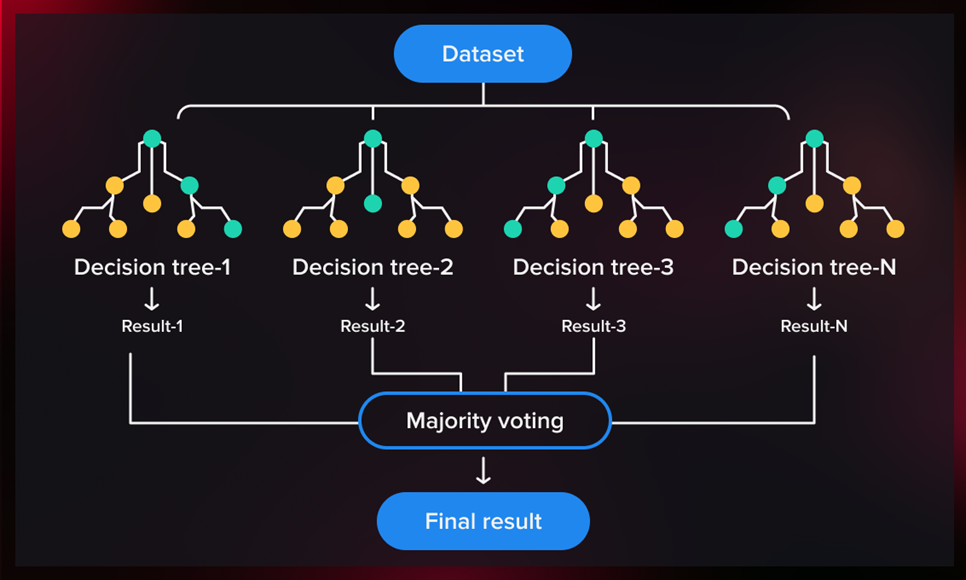

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1: Read the train dataset

In [2]:
import pandas as pd 
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
m = df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:

df.duplicated().sum()

0

# Step 3: Seperate X and Y(Survived)

In [6]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Step 3: Perform Preprocessing on X

In [9]:
# Cat con seperation
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [10]:
cat

['Sex', 'Embarked']

In [11]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [14]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [15]:
pre = ColumnTransformer([('num',num_pipe, con),
                         ('cat',cat_pipe, cat)]).set_output(transform='pandas')

In [16]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


# Step 4: Apply train test split

In [17]:

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [18]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
793,-1.566107,-0.104637,-0.474545,-0.473674,-0.030371,0.0,1.0,1.0,0.0,0.0
23,-1.566107,-0.104637,-0.474545,-0.473674,0.066360,0.0,1.0,0.0,0.0,1.0
97,-1.566107,-0.488887,-0.474545,0.767630,0.627278,0.0,1.0,1.0,0.0,0.0
9,-0.369365,-1.180535,0.432793,-0.473674,-0.042956,1.0,0.0,1.0,0.0,0.0
157,0.827377,0.049062,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [19]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [20]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
617,0.827377,-0.258337,0.432793,-0.473674,-0.324253,1.0,0.0,0.0,0.0,1.0
379,0.827377,-0.796286,-0.474545,-0.473674,-0.491874,0.0,1.0,0.0,0.0,1.0
725,0.827377,-0.719436,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
826,0.827377,-0.104637,-0.474545,-0.473674,0.489104,0.0,1.0,0.0,0.0,1.0
450,-0.369365,0.510161,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0


In [21]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


In [22]:
xtrain.shape

(712, 10)

In [23]:
ytrain.shape

(712, 1)

# Step 5: Build and Tune model

In [24]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1,
                                max_depth=1,
                                min_samples_split=5,
                                min_samples_leaf=5,
                                criterion='entropy')
model1.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1)

In [25]:
model1.score(xtrain,ytrain)

0.6404494382022472

In [26]:
model1.score(xtest,ytest)

0.6201117318435754

# Tune above model with RandomizedSearchCV (faster than grid search)

In [27]:
## u can use any 4 parameter 
params = {'n_estimators':[10, 50, 100, 200, 300],
          'max_depth':[1, 2, 3, 4, 5, 6, 7, 8],
          'min_samples_split':[2, 3, 4, 5, 6, 7, 8],
          'criterion':['gini', 'entropy']}

In [28]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc , param_distributions=params ,cv=5 , scoring='f1_macro')
rscv1.fit(xtrain,ytrain) 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [29]:
rscv1.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'max_depth': 5,
 'criterion': 'entropy'}

In [30]:
rscv1.best_score_

0.7986767547613632

In [31]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=7)

In [32]:
best_rfc.score(xtrain,ytrain)

0.8539325842696629

In [33]:
best_rfc.score(xtest,ytest)

0.8268156424581006

# Build Gradient Boosting model
## Corrective decision trees are added sequentially to reduce the error
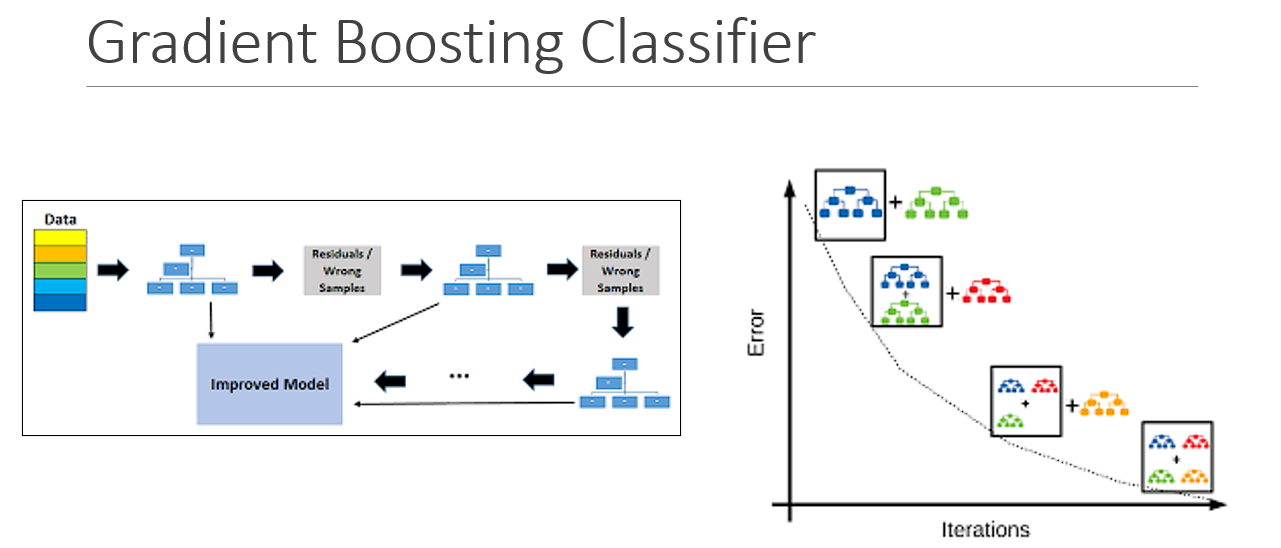

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(learning_rate=0.5,
                                    n_estimators=1,
                                    max_depth=1,
                                    min_samples_split=5,
                                    min_samples_leaf=5)
model2.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [35]:
model2.score(xtrain,ytrain)

0.7879213483146067

In [36]:
model2.score(xtest,ytest)

0.7821229050279329


# Tuning gradient boost

In [37]:
params2 = {'learning_rate':[0.01, 0.1, 0.15, 0.2],
           'n_estimators':[10, 50, 100, 200, 300],
           'max_depth':[1, 2, 3, 4, 5, 6, 7],
           'min_samples_split':[2, 3, 4, 5, 6, 7]}

In [38]:
gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc , param_distributions=params2 , cv = 5 , scoring="f1_macro")
rscv2.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [39]:
rscv2.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'max_depth': 3,
 'learning_rate': 0.2}

In [40]:
rscv2.best_score_

0.8008178372808026

In [41]:
best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.2, min_samples_split=6,
                           n_estimators=10)

In [42]:
best_gbc.score(xtrain,ytrain)

0.8441011235955056

In [43]:
best_gbc.score(xtest,ytest)

0.8212290502793296

##  Here Gradient boosting (0.8547 test) is slightly better than Random forest (0.8044)

# Select final model with higher test score i.e. Gradient boosting

In [44]:
ypred_train = best_gbc.predict(xtrain)
ypred_test = best_gbc.predict(xtest)

In [45]:
ypred_train[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [46]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [47]:
ypred_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [48]:
ytest[0:5]

,Survived
617,0
379,0
725,0
826,0
450,0


# Plot the confusion matrix

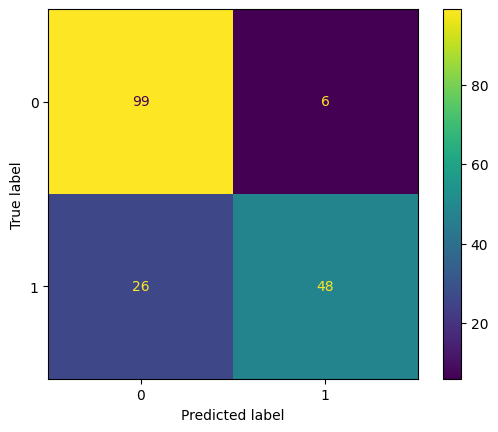

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_gbc , xtest , ytest)


In [50]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       105
           1       0.89      0.65      0.75        74

    accuracy                           0.82       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179



# The Gradient boosting model is good because it has f1_macro of 0.85  > 0.80


# Step 6: Perfom out of sample predictions

In [51]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
pre


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [53]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,0.827377,-0.104637,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0
414,-1.566107,0.740711,-0.474545,-0.473674,1.544246,1.0,0.0,1.0,0.0,0.0
415,0.827377,0.702286,-0.474545,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
416,0.827377,-0.104637,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [54]:
preds = best_gbc.predict(xnew_pre)
probs = best_gbc.predict_proba(xnew_pre)

In [55]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
probs

array([[0.85698463, 0.14301537],
       [0.54016731, 0.45983269],
       [0.85698463, 0.14301537],
       [0.85698463, 0.14301537],
       [0.5340559 , 0.4659441 ],
       [0.85698463, 0.14301537],
       [0.36861943, 0.63138057],
       [0.76612049, 0.23387951],
       [0.3011116 , 0.6988884 ],
       [0.85698463, 0.14301537],
       [0.85698463, 0.14301537],
       [0.81474624, 0.18525376],
       [0.12018029, 0.87981971],
       [0.85698463, 0.14301537],
       [0.12018029, 0.87981971],
       [0.15248928, 0.84751072],
       [0.85698463, 0.14301537],
       [0.84113054, 0.15886946],
       [0.5340559 , 0.4659441 ],
       [0.37435873, 0.62564127],
       [0.67119123, 0.32880877],
       [0.4809541 , 0.5190459 ],
       [0.14219126, 0.85780874],
       [0.67119123, 0.32880877],
       [0.12018029, 0.87981971],
       [0.85698463, 0.14301537],
       [0.12018029, 0.87981971],
       [0.84113054, 0.15886946],
       [0.61718965, 0.38281035],
       [0.84113054, 0.15886946],
       [0.

In [57]:
best_gbc.classes_

array([0, 1], dtype=int64)

In [58]:
prob_sur = probs[:, 1]
prob_sur

array([0.14301537, 0.45983269, 0.14301537, 0.14301537, 0.4659441 ,
       0.14301537, 0.63138057, 0.23387951, 0.6988884 , 0.14301537,
       0.14301537, 0.18525376, 0.87981971, 0.14301537, 0.87981971,
       0.84751072, 0.14301537, 0.15886946, 0.4659441 , 0.62564127,
       0.32880877, 0.5190459 , 0.85780874, 0.32880877, 0.87981971,
       0.14301537, 0.87981971, 0.15886946, 0.38281035, 0.15886946,
       0.14301537, 0.24931843, 0.4659441 , 0.32726745, 0.32880877,
       0.15886946, 0.4659441 , 0.4659441 , 0.14301537, 0.42823964,
       0.15886946, 0.29375508, 0.14301537, 0.82504103, 0.8924871 ,
       0.14301537, 0.41245329, 0.14301537, 0.85694679, 0.4659441 ,
       0.30208653, 0.15886946, 0.84751072, 0.87981971, 0.15886946,
       0.16664355, 0.14301537, 0.14301537, 0.14301537, 0.87981971,
       0.14301537, 0.14301537, 0.14301537, 0.63138057, 0.2739255 ,
       0.82504103, 0.63138057, 0.27919439, 0.32007833, 0.85694679,
       0.63138057, 0.14301537, 0.4659441 , 0.32007833, 0.87981

In [59]:
prob_sur[0:5]


array([0.14301537, 0.45983269, 0.14301537, 0.14301537, 0.4659441 ])

# Saving above results in dataframe

In [60]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [61]:
df_final['Survived_pred'] = preds 
df_final['Probability_sur'] = prob_sur 

In [62]:
df_final

,PassengerId,Survived_pred,Probability_sur
0,892,0,0.143015
1,893,0,0.459833
2,894,0,0.143015
3,895,0,0.143015
4,896,0,0.465944
...,...,...,...
413,1305,0,0.143015
414,1306,1,0.879820
415,1307,0,0.143015
416,1308,0,0.143015


In [63]:
df_final.to_csv('GBCresults.csv' , index = False)

In [64]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    295
1    123
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

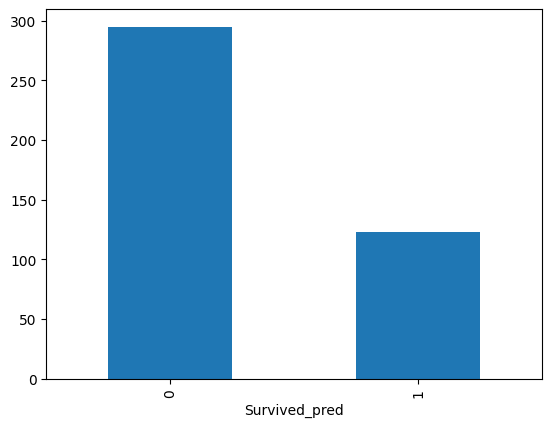

In [65]:
df_final['Survived_pred'].value_counts().plot(kind='bar')

# Feature Importancesv
### Which features are more important

In [66]:
imp = best_gbc.feature_importances_
imp

array([0.15382469, 0.08424571, 0.04511241, 0.        , 0.10973849,
       0.21381572, 0.36278516, 0.00308016, 0.        , 0.02739765])

In [67]:
sum(imp)

0.9999999999999999

In [68]:
xtrain.columns


Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [69]:
imp_ser = pd.Series(imp)
imp_ser.index = xtrain.columns
imp_ser

num__Pclass        0.153825
num__Age           0.084246
num__SibSp         0.045112
num__Parch         0.000000
num__Fare          0.109738
cat__Sex_female    0.213816
cat__Sex_male      0.362785
cat__Embarked_C    0.003080
cat__Embarked_Q    0.000000
cat__Embarked_S    0.027398
dtype: float64

In [70]:
imp_ser.sort_values(ascending=False)

cat__Sex_male      0.362785
cat__Sex_female    0.213816
num__Pclass        0.153825
num__Fare          0.109738
num__Age           0.084246
num__SibSp         0.045112
cat__Embarked_S    0.027398
cat__Embarked_C    0.003080
num__Parch         0.000000
cat__Embarked_Q    0.000000
dtype: float64

<Axes: title={'center': 'Feature Important'}>

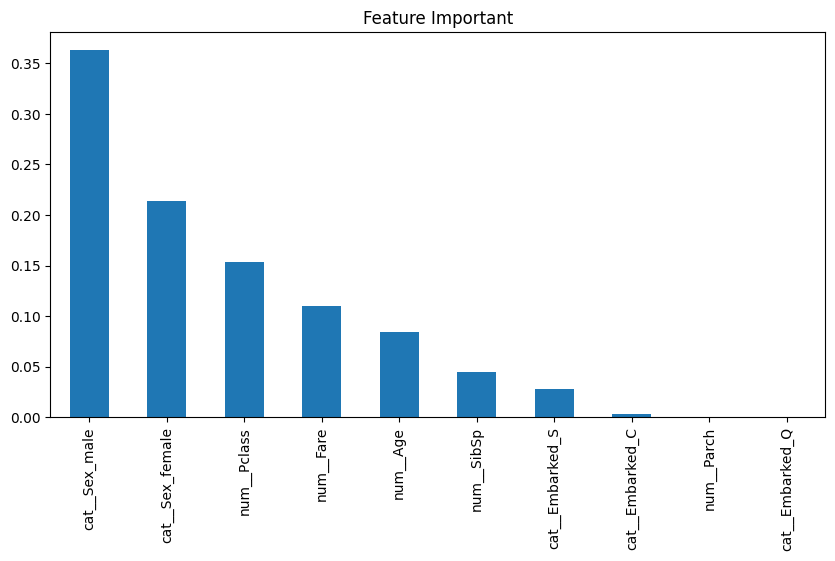

In [71]:
imp_ser.sort_values(ascending=False).plot(kind='bar',
                                          title='Feature Important',
                                          figsize=(10,5))